## CIFAR-10 Image Classification

Implementation pipeline:
- Load and Explore the CIFAR-10 Dataset
- Preprocess the Data
- Build the CNN Model
- Compile the Model
- Train the Model
- Evaluate the Model
- Make Predictions

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 10


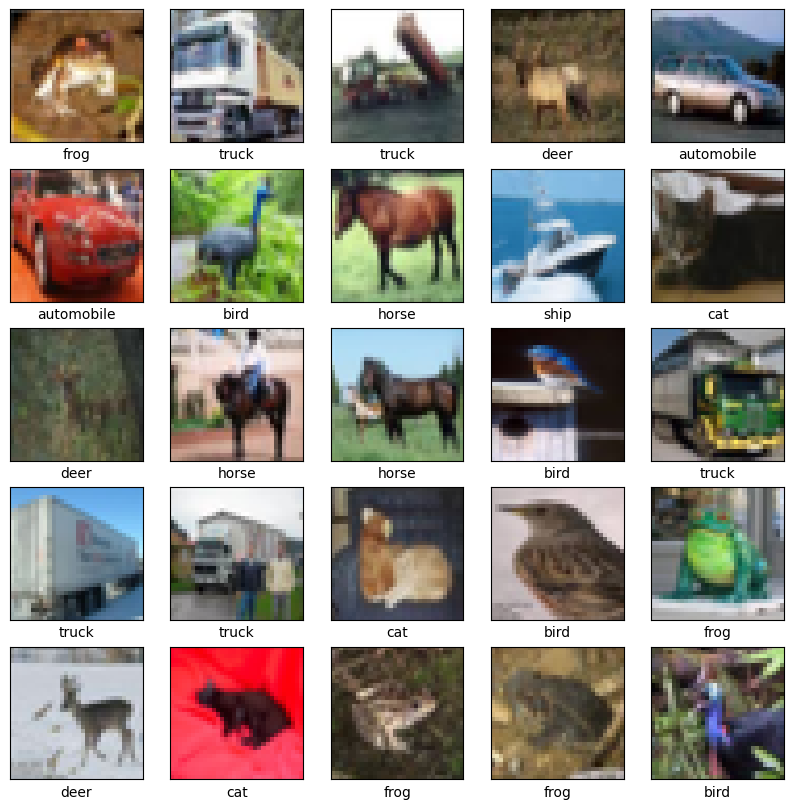

In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Explore the data
print(f'Training data shape: {train_images.shape}')
print(f'Test data shape: {test_images.shape}')
print(f'Number of classes: {len(class_names)}')

# Display the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [2]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 1.5181 - accuracy: 0.4417 - val_loss: 1.2412 - val_accuracy: 0.5533
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1691 - accuracy: 0.5824 - val_loss: 1.0980 - val_accuracy: 0.6101
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0051 - accuracy: 0.6450 - val_loss: 1.0227 - val_accuracy: 0.6380
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8979 - accuracy: 0.6837 - val_loss: 0.9232 - val_accuracy: 0.6793
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8131 - accuracy: 0.7139 - val_loss: 0.8846 - val_accuracy: 0.6934
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7490 - accuracy: 0.7385 - val_loss: 0.8884 - val_accuracy: 0.6952
Epoch 7/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7030 - accuracy: 0.7530 - val_loss: 0.8693 -

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 4s - loss: 0.8841 - accuracy: 0.7111 - 4s/epoch - 12ms/step

Test accuracy: 0.7110999822616577


313/313 [==============================] - 4s 11ms/step


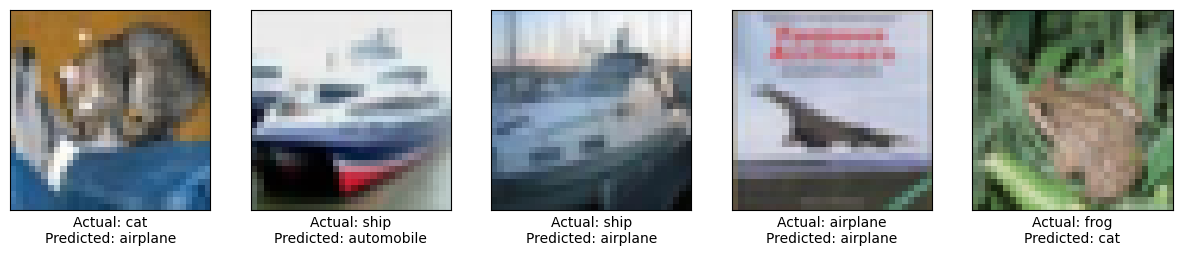

In [21]:
predictions = model.predict(test_images)

# Display the first 5 predictions
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    plt.xlabel(f'Actual: {class_names[test_labels[i][0]]}\nPredicted: {class_names[tf.argmax(predictions[i])]}')
plt.show()


## References
- https://en.wikipedia.org/wiki/CIFAR-10
- https://www.tensorflow.org/datasets/catalog/cifar10
- Paper with code: https://paperswithcode.com/sota/image-classification-on-cifar-10
